<a href="https://colab.research.google.com/github/Carvas91/PyTroch/blob/main/train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns

iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data),dtype=torch.long)

labels[iris.species == 'versicolor' ] = 1
labels[iris.species == 'virginica'] = 2

In [3]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [4]:
fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T

fakelabels = np.arange(10)>4

print(fakedata)

print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
[False False False False False  True  True  True  True  True]


In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(fakedata, fakelabels, test_size=.2)

print(f'Training data size: {train_data.shape}')
print(f'Test data size: {test_data.shape}')
print(f'Training labels size: {train_labels.shape}')
print(f'Test data size: {test_labels.shape}')

Training data size: (8, 4)
Test data size: (2, 4)
Training labels size: (8,)
Test data size: (2,)


In [6]:
def createModel():
  ANNIris = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3)
  )

  lossfun = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(ANNIris.parameters(), lr=0.01)

  return ANNIris, lossfun, optimizer

In [13]:
epochs = 100


def trainModel(trainProp, model):
    losses = torch.zeros(epochs)
    trainacc = []
    testacc = []

    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=trainProp)

    for i in range(epochs):


        yHat = model(X_train)

        loss = lossfun(yHat, y_train)
        losses[i] = loss.detach()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        trainacc.append(torch.mean((torch.argmax(yHat, axis=1) == y_train).float()).item() * 100)

        predlabels = torch.argmax(model(X_test), axis=1)
        testacc.append(torch.mean((predlabels == y_test).float()).item() * 100)

    return trainacc, testacc  # ✅ Moved outside the loop


In [14]:
ANNIris, lossfun, optimizer = createModel()

In [15]:
trainacc, testacc = trainModel(.8, ANNIris)
print(trainacc[-1])
print(testacc[-1])

70.83333134651184
66.66666865348816


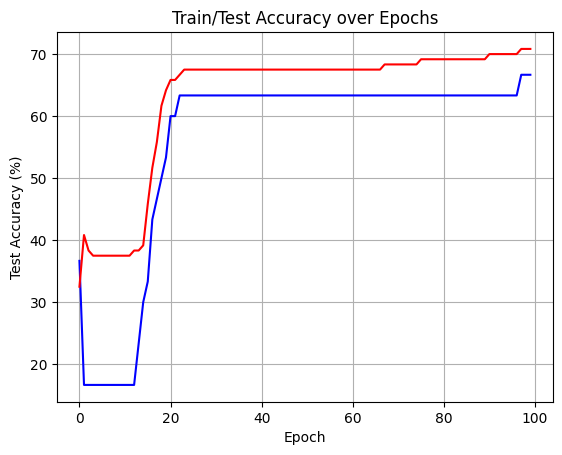

In [18]:
plt.plot(testacc, 'b')
plt.plot(trainacc, 'r')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (%)')
plt.title('Train/Test Accuracy over Epochs')
plt.grid(True)
plt.show()